In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,Gaiking II,2011


In [61]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

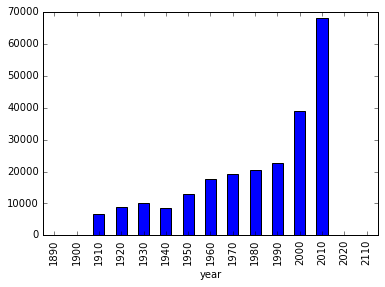

In [9]:
titles.groupby(titles.year //10*10).size().plot('bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

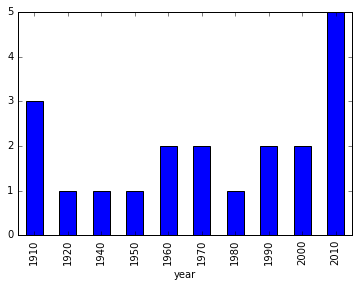

In [12]:
t=titles[titles.title=="Hamlet"]
t.groupby(t.year//10*10).size().plot('bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [27]:
c=cast[cast.n==1]
c=c[c.year//10==195]

In [28]:
c.groupby(['year','type']).size()

year  type   
1950  actor      628
      actress    286
1951  actor      652
      actress    285
1952  actor      612
      actress    301
1953  actor      657
      actress    306
1954  actor      640
      actress    310
1955  actor      650
      actress    283
1956  actor      662
      actress    310
1957  actor      734
      actress    307
1958  actor      716
      actress    295
1959  actor      733
      actress    321
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [29]:
c=cast[(cast.year//10==195) & ((cast.n<=5) & (cast.n>=1))]

In [32]:
c.groupby(['type','n']).size()

type     n  
actor    1.0    6684
         2.0    4617
         3.0    5635
         4.0    5645
         5.0    5663
actress  1.0    3004
         2.0    4601
         3.0    3186
         4.0    2866
         5.0    2563
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [46]:
c=cast[cast.title=='The Pink Panther']

In [54]:
c.sort('n').groupby('year')['n'].max()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


year
1963    15.0
2006    50.0
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [63]:
c=cast[cast.name=='Frank Oz']

In [66]:
g=c.groupby([cast.year,cast.title]).size()
g[g>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [ ]:
c=cast[cast.name=='Frank Oz']

In [67]:
g=c.groupby([cast.character]).size()


In [70]:
g[g>1].order()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


character
Grover            2
Bert              3
Cookie Monster    4
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64